### Creating uw xyz files

In [1]:
import numpy as np
import transform_data_coords as tds
from matplotlib import pyplot as plt

In [2]:
def geolonlatr2sphxyz(lonlatr):
    """
    transforms layer (lon, lat, r) in geographical coordinates to uw (lon,lat,r) and (x, y, z) coordinates
    """
    lonlatr_noNaN = lonlatr[~np.isnan(lonlatr[:,2])]
    lonlatr_noNaN[:,2] = lonlatr_noNaN[:,2]
    lonlatr_noNaN[:,0:2] = tds.geolonlat2translonlat(lonlatr_noNaN[:,0:2])
    lonlatr_Slonlatr = tds.translonlatr2sphlonlatr(lonlatr_noNaN)
#    lonlatr_Sxyz = tds.sphlonlatr2sphxyz(lonlatr_Slonlatr)
    lonlatr_Slonlatr_cut = lonlatr_Slonlatr[np.logical_and(np.logical_and(lonlatr_Slonlatr[:,0] >= -32.5, 
                                                                          lonlatr_Slonlatr[:,0] <= 32.5), 
                                                           np.logical_and(lonlatr_Slonlatr[:,1] >= -43.5, 
                                                                          lonlatr_Slonlatr[:,1] <= 43.5))]
    lonlatr_Sxyz_cut = tds.sphlonlatr2sphxyz(lonlatr_Slonlatr_cut)
    return lonlatr_Sxyz_cut

In [3]:
def reduce_data_2_model_size(dataset, lon_min, lon_max, lat_min, lat_max):
    """
    Reduces the size of the given dataset to model size
    """
    if type(dataset) == str:
        _data = np.loadtxt(dataset, delimiter=',')
    else:
        _data = dataset
    model_data = _data[np.logical_and(np.logical_and(_data[:, 0] >= lon_min, _data[:, 0] <= lon_max),
                                      np.logical_and(_data[:, 1] >= lat_min, _data[:, 1] <= lat_max))]
    return model_data

def remove_nan_data(_data):
    """
    Removes NaN data points from the data
    """
    data_noNaN = _data[~np.isnan(_data[:, 2])]
    return data_noNaN

In [4]:
# Geographical latitude and longitude values of the model domain
lon_min = 57
lon_max = 122
lat_min = -52
lat_max = 35
tc = tds.transform_coords(lon_min, lon_max, lat_min, lat_max) # calling transform coordinate class

In [5]:
#loading layers
# sum_layer_org = np.loadtxt('../sum_slab2_dep_02.23.18.xyz', delimiter=',')
# sum_layer_org[:,2] = -sum_layer_org[:,2]

# sum_5up_layer_var = np.loadtxt('../sum_5up_layer_var.txt', delimiter=',')
# sum_layer_var = np.loadtxt('../sum_layer_var.txt', delimiter=',')

# sum_5up_layer_10_below = np.loadtxt('../sum_5up_layer_-10.txt', delimiter=',')
# sum_5up_layer_20_below = np.loadtxt('../sum_5up_layer_-20.txt', delimiter=',')
# sum_5up_layer_30_below = np.loadtxt('../sum_5up_layer_-30.txt', delimiter=',')
# sum_5up_layer_50_below = np.loadtxt('../sum_5up_layer_-50.txt', delimiter=',')
# sum_5up_layer_15_below = np.loadtxt('../sum_5up_layer_-15.txt', delimiter=',')

sum_5up_layer_5 = np.loadtxt('../sum_5up_layer_5.txt', delimiter=',')
sum_5up_layer_10 = np.loadtxt('../sum_5up_layer_10.txt', delimiter=',')
sum_5up_layer_15 = np.loadtxt('../sum_5up_layer_15.txt', delimiter=',')
sum_5up_layer_20 = np.loadtxt('../sum_5up_layer_20.txt', delimiter=',')

In [6]:
def remove_pt_rad_less_1km(surface_pts, output_path, file_name):
    """
    points with radius less than 1km are removed.
    """
    neg_radius_indx = np.where(surface_pts[:,2] <= 1)
    copy_arr = np.copy(surface_pts)
    copy_arr[:,2][neg_radius_indx] = 'nan'
    np.savetxt(output_path+file_name, copy_arr, fmt='%3.6f,%3.6f,%3.12f', delimiter=',')
    return

In [7]:
# removing pts with radius less than 1km
create_file = False # files are created
if create_file:
    remove_pt_rad_less_1km(sum_5up_layer_10, '../', 'sum_5up_layer_10_mod.txt')
    remove_pt_rad_less_1km(sum_5up_layer_15, '../', 'sum_5up_layer_15_mod.txt')
    remove_pt_rad_less_1km(sum_5up_layer_20, '../', 'sum_5up_layer_20_mod.txt')

In [8]:
#loading layers
sum_5up_layer_10_mod = np.loadtxt('../sum_5up_layer_10_mod.txt', delimiter=',')
sum_5up_layer_15_mod = np.loadtxt('../sum_5up_layer_15_mod.txt', delimiter=',')
sum_5up_layer_20_mod = np.loadtxt('../sum_5up_layer_20_mod.txt', delimiter=',')

In [9]:
"""
check negative depth (i.e., points whose radius is more thanb 6371 km). 
Note: In the current uw domain range all points are positive depth
"""
def neg_rad_to_min(layer_arr, plot_surface=False):
    """
    negative radius values are replaced by minimun +ve radius value
    """
    sum_5up_layer_dep_noNaN = remove_nan_data(layer_arr)
    neg_radius_indx = np.where(sum_5up_layer_dep_noNaN[:,2] <= 0)
    copy_arr = np.copy(sum_5up_layer_dep_noNaN)
    copy_arr[:,2][neg_radius_indx] = 1e-5
    if plot_surface:
        plt.figure(figsize=(8, 8))
        plt.scatter(sum_5up_layer_dep_noNaN[:,0], sum_5up_layer_dep_noNaN[:,1])
        plt.scatter(sum_5up_layer_dep_noNaN[neg_radius_indx][:,0], sum_5up_layer_dep_noNaN[neg_radius_indx][:,1],c='r')
    return copy_arr

664.774899230572 1.003039973819


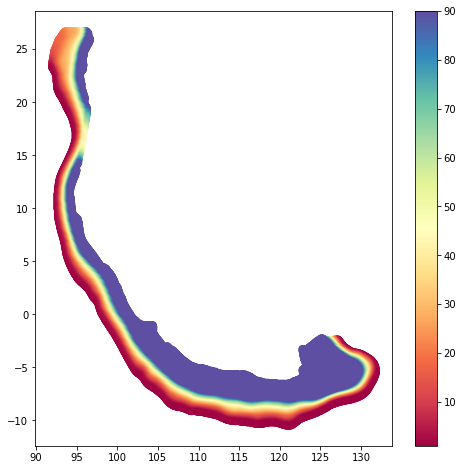

In [10]:
non_neg = neg_rad_to_min(sum_5up_layer_15_mod)
# neg_rad_to_1(sum_5up_layer_15)
# neg_rad_to_1(sum_5up_layer_20)
print(np.max(non_neg[:,2]), np.min(non_neg[:,2]))

plt.figure(figsize=(8, 8))
plt.scatter(non_neg[:,0], non_neg[:,1], c=non_neg[:,2], cmap=plt.cm.get_cmap('Spectral'))
plt.clim(1, 90)
plt.colorbar()

In [11]:
# # transforming coordinates and saving to txt file
# sum_layer_org_sxyz = geolonlatr2sphxyz(sum_layer_org)
# np.savetxt('./sum_layer_org_sxyz.txt', np.c_[sum_layer_org_sxyz], fmt='%3.12f')

# sum_5up_layer_5_sxyz = geolonlatr2sphxyz(sum_5up_layer_5)
# np.savetxt('./sum_5up_layer_5_sxyz.txt', np.c_[sum_5up_layer_5_sxyz], fmt='%3.12f')

# sum_5up_layer_var_sxyz = geolonlatr2sphxyz(sum_5up_layer_var)
# np.savetxt('./sum_5up_layer_var_sxyz.txt', np.c_[sum_5up_layer_var_sxyz], fmt='%3.12f')

# sum_layer_var_sxyz = geolonlatr2sphxyz(sum_layer_var)
# np.savetxt('./sum_layer_var_sxyz.txt', np.c_[sum_layer_var_sxyz], fmt='%3.12f')

# sum_5up_layer_10_below_sxyz = geolonlatr2sphxyz(sum_5up_layer_10_below)
# np.savetxt('./sum_5up_layer_-10_sxyz.txt', np.c_[sum_5up_layer_10_sxyz], fmt='%3.12f')

# sum_5up_layer_20_below_sxyz = geolonlatr2sphxyz(sum_5up_layer_20_below)
# np.savetxt('./sum_5up_layer_-20_sxyz.txt', np.c_[sum_5up_layer_20_sxyz], fmt='%3.12f')

# sum_5up_layer_30_below_sxyz = geolonlatr2sphxyz(sum_5up_layer_30_below)
# np.savetxt('./sum_5up_layer_-30_sxyz.txt', np.c_[sum_5up_layer_30_sxyz], fmt='%3.12f')

# sum_5up_layer_50_below_sxyz = geolonlatr2sphxyz(sum_5up_layer_50_below)
# np.savetxt('./sum_5up_layer_-50_sxyz.txt', np.c_[sum_5up_layer_50_sxyz], fmt='%3.12f')

# sum_5up_layer_15_below_sxyz = geolonlatr2sphxyz(sum_5up_layer_15_below)
# np.savetxt('./sum_5up_layer_-15_sxyz.txt', np.c_[sum_5up_layer_15_sxyz], fmt='%3.12f')

In [12]:
def save_uwxyz_surface(surface_arr, file_name, plot_surface=False):
    """
    convert and save surface in geo coords to uwxyz
    """
    reduce_size = reduce_data_2_model_size(surface_arr, lon_min, lon_max, lat_min, lat_max)
    surface_uwxyz = tc.geo_lonlatr2uw_xyz(reduce_size)
    np.savetxt('./'+file_name+'.txt', np.c_[surface_uwxyz], fmt='%3.12f', delimiter=',')
    if plot_surface:
        plt.figure(figsize=(8, 8))
        plt.scatter(reduce_size[:,0], reduce_size[:,1])   
    return

In [13]:
save_uwxyz_surface(neg_rad_to_min(sum_5up_layer_5), 'sum_5up_layer_5_sxyz')
save_uwxyz_surface(neg_rad_to_min(sum_5up_layer_10), 'sum_5up_layer_10_sxyz')
save_uwxyz_surface(neg_rad_to_min(sum_5up_layer_15), 'sum_5up_layer_15_sxyz')
save_uwxyz_surface(neg_rad_to_min(sum_5up_layer_20), 'sum_5up_layer_20_sxyz')
save_uwxyz_surface(neg_rad_to_min(sum_5up_layer_10_mod), 'sum_5up_layer_10_mod_sxyz')
save_uwxyz_surface(neg_rad_to_min(sum_5up_layer_15_mod), 'sum_5up_layer_15_mod_sxyz')
save_uwxyz_surface(neg_rad_to_min(sum_5up_layer_20_mod), 'sum_5up_layer_20_mod_sxyz')

In [14]:
print(np.max(neg_rad_to_min(sum_5up_layer_5)[:,2]), np.min(neg_rad_to_min(sum_5up_layer_5)[:,2]))
print(np.max(neg_rad_to_min(sum_5up_layer_10)[:,2]), np.min(neg_rad_to_min(sum_5up_layer_10)[:,2]))
print(np.max(neg_rad_to_min(sum_5up_layer_15)[:,2]), np.min(neg_rad_to_min(sum_5up_layer_15)[:,2]))
print(np.max(neg_rad_to_min(sum_5up_layer_20)[:,2]), np.min(neg_rad_to_min(sum_5up_layer_20)[:,2]))
print(np.max(neg_rad_to_min(sum_5up_layer_10_mod)[:,2]), np.min(neg_rad_to_min(sum_5up_layer_10_mod)[:,2]))
print(np.max(neg_rad_to_min(sum_5up_layer_15_mod)[:,2]), np.min(neg_rad_to_min(sum_5up_layer_15_mod)[:,2]))
print(np.max(neg_rad_to_min(sum_5up_layer_20_mod)[:,2]), np.min(neg_rad_to_min(sum_5up_layer_20_mod)[:,2]))

669.957246622789 1e-05
666.293775974549 1e-05
664.774899230572 1e-05
663.252046659084 1e-05
666.293775974549 1.000205563714
664.774899230572 1.003039973819
663.252046659084 1.002638447005
